In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd /content/drive/My Drive/Colab Notebooks/For git

/content/drive/My Drive/Colab Notebooks/For git


In [3]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/For git/')

In [4]:
from all_methods import *

Using TensorFlow backend.


###Подготовка вторых признаковых описаний

In [5]:
way = '/content/drive/My Drive/Colab Notebooks/Second_features/'
update_way(way)

In [ ]:
features2 = np.load(way + 'features2.npy')
features2 = features2[1:]

In [ ]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
features2[0, :571]

In [ ]:
features2[0, 571:]

In [ ]:
features2_ = features2
features2_[0, 571:][features2_[0, 571:] == 255] = 1

In [ ]:
features2_[0, 571:]

In [ ]:
features2_[0]

In [ ]:
X2 = (features2_ - np.mean(features2_, axis = 0)) / np.std(features2_, axis = 0)

In [ ]:
X2[0]

*Возможно лучший вариант - первые признаки+подробные сигнальные через isomap, который показал свою эффективность; cv-картинки - через автоэнкодер, который как раз-таки сможет учесть картиночную природу данных через свёрточные сети; потом их совместить, при необходимости ещё понизив через тот же isomap.
Ещё неплохо посмотреть t-SNE или LLE.*

###Эффективная размерность

In [6]:
way = '/content/drive/My Drive/Colab Notebooks/Second_features/'
update_way(way)

In [ ]:
pca = PCA()
X2_pca = pca.fit_transform(X2)

In [ ]:
np.save(way+'X2_pca__singular_values.npy', pca.singular_values_)

In [ ]:
print(pca.singular_values_)

[1.85993717e+03 1.50062609e+03 1.05568722e+03 9.70583331e+02
 8.93600558e+02 8.46250000e+02 8.05484059e+02 7.73788300e+02
 7.61796895e+02 7.28831426e+02 7.02981003e+02 6.93061079e+02
 6.64492824e+02 6.45386011e+02 6.19434530e+02 6.07452410e+02
 5.91338225e+02 5.86910727e+02 5.84105674e+02 5.73160700e+02
 5.53828265e+02 5.47363747e+02 5.42909261e+02 5.29503097e+02
 5.22990522e+02 5.17949166e+02 5.14020717e+02 5.05785621e+02
 4.97472066e+02 4.92741063e+02 4.86240272e+02 4.81872687e+02
 4.77677601e+02 4.73718195e+02 4.65651099e+02 4.64418317e+02
 4.59886954e+02 4.58738070e+02 4.50784754e+02 4.46781048e+02
 4.43055749e+02 4.38906125e+02 4.35259361e+02 4.32472213e+02
 4.29662388e+02 4.28816307e+02 4.23904365e+02 4.22498655e+02
 4.20353379e+02 4.16337587e+02 4.13543116e+02 4.11106197e+02
 4.09461753e+02 4.07722492e+02 4.06066989e+02 4.02377888e+02
 4.01128087e+02 3.99888586e+02 3.97863023e+02 3.92505340e+02
 3.89737330e+02 3.86788184e+02 3.85980577e+02 3.82999482e+02
 3.80703215e+02 3.804020

In [ ]:
pca.singular_values_.shape

(5571,)

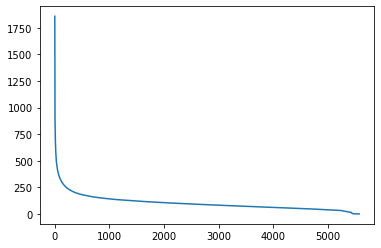

In [ ]:
plt.plot(np.arange(pca.singular_values_.shape[0]), pca.singular_values_) # по графику собственных значений хотим понять, какую выбрать размерность

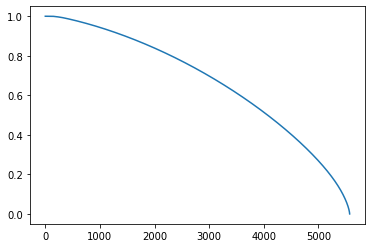

In [ ]:
all_lambda_sum = np.sum(pca.singular_values_)
E = []
for i in range(pca.singular_values_.shape[0], -1, -1):
  E.append(np.sum(pca.singular_values_[:i]) / all_lambda_sum)
plt.plot(np.arange(pca.singular_values_.shape[0] + 1), E)

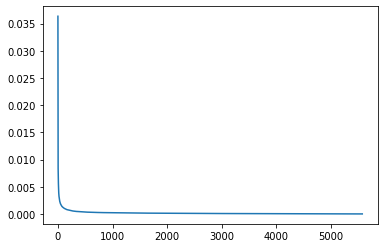

In [ ]:
plt.plot(pca.explained_variance_ratio_)

###Кластеризация после pca до 1500

In [ ]:
X2_pca1500 = reduce_pca('X2_pca1500', X2, 1500)

In [ ]:
X2_pca1500_optics = clust_optics('X2_pca1500_optics', X2_pca1500, 15, 0.01, 30)

In [ ]:
np.unique(X2_pca1500_optics.labels_)

array([-1,  0])

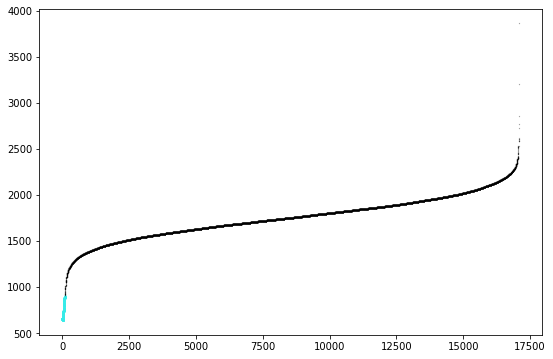

In [ ]:
reachability_plot(X2_pca1500_optics, limx=[0, 0])

In [ ]:
X2_pca1500_optics1 = clust_optics('X2_pca1500_optics', X2_pca1500, 5, 0.001, 10)

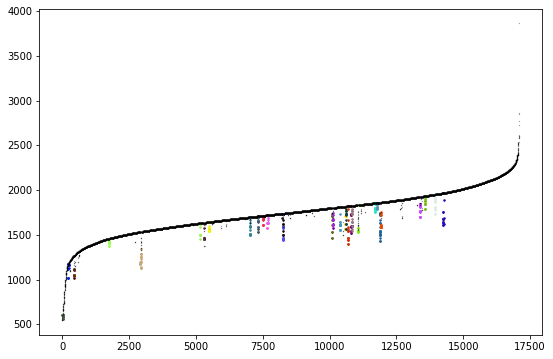

In [ ]:
reachability_plot(X2_pca1500_optics1)

In [ ]:
visualize_clusters(objects, X2_pca1500_optics1.labels_) # мало, зато какие чёткие!

In [ ]:
X2_pca1500_optics1 = clust_optics('X2_pca1500_optics', X2_pca1500, 2, 0.0005, None)

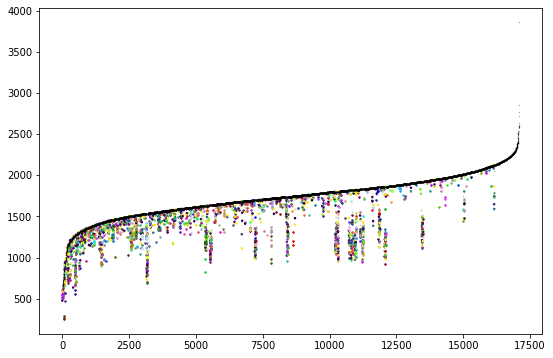

In [ ]:
reachability_plot(X2_pca1500_optics1)

In [ ]:
visualize_clusters(objects, X2_pca1500_optics1.labels_)

###Кластеризация после pca до 1500 небольшого кусочка

*может для какого-то размера маленького кусочка будут получаться хорошие результаты*

In [ ]:
X2_pca1500 = np.load(way + 'X2_pca1500.npy')

In [ ]:
X2_pca1500_part1 = X2_pca1500[:2000]

In [ ]:
X2_pca1500_part1_optics = clust_optics('X2_pca1500_part1_optics', X2_pca1500_part1, 5, 0.0005, None)

In [ ]:
np.unique(X2_pca1500_part1_optics.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55])

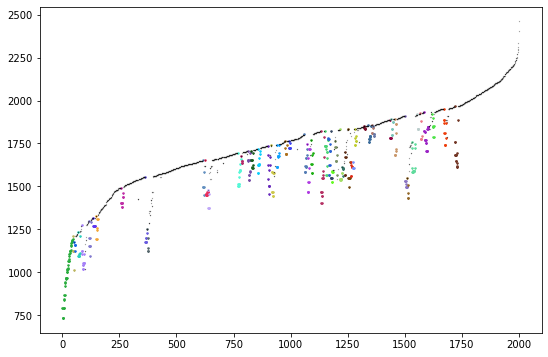

In [ ]:
reachability_plot(X2_pca1500_part1_optics)

In [ ]:
visualize_clusters(objects[:2000], X2_pca1500_part1_optics.labels_)

In [ ]:
X2_pca1500_part1_optics1 = clust_optics('X2_pca1500_part1_optics', X2_pca1500_part1, 2, 0.0005, None)

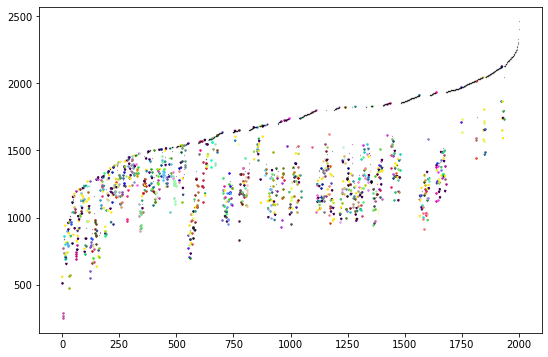

In [ ]:
reachability_plot(X2_pca1500_part1_optics1)

In [ ]:
visualize_clusters(objects[:2000], X2_pca1500_part1_optics1.labels_)

In [ ]:
heavy_clusters(X2_pca1500_part1_optics1)

###Разные виды признаков редуцируем с помощью разных методов

In [ ]:
features2_1 = features2[:,:21]
features2_1

In [ ]:
X2_1 = (features2_1 - np.mean(features2_1, axis = 0)) / np.std(features2_1, axis = 0)

In [ ]:
features2_2 = features2[:,21:571]
features2_2

In [ ]:
X2_2 = (features2_2 - np.mean(features2_2, axis = 0)) / np.std(features2_2, axis = 0)

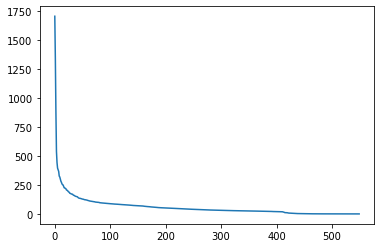

In [ ]:
pca = PCA()
X2_2_pca = pca.fit_transform(X2_2)
plt.plot(np.arange(pca.singular_values_.shape[0]), pca.singular_values_)

In [ ]:
X2_2_pca = reduce_pca('X2_2_pca', X2_2, 30)

In [ ]:
#X2_2_isomap = reduce_isomap('X2_2_isomap', X2_2, 30, 5)

In [ ]:
features2_3 = np.load(way + 'features2_bw.npy')
features2_3 = features2_3[1:]/255

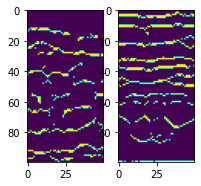

In [ ]:
# исходные объекты
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(3, 6))           
a1 = ax1.imshow(features2_3[0])
a2 = ax2.imshow(features2_3[1])
plt.show()

In [ ]:
features2_3.shape

(17080, 100, 50)

In [ ]:
X2_3 = np.reshape(features2_3, (17080,100,50,1)).astype('float32')

In [ ]:
X2_3.shape

(17080, 100, 50, 1)

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

In [ ]:
TF_CUDNN_USE_AUTOTUNE=0
#sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [ ]:
x_train, x_test = train_test_split(X2_3, test_size = 0.1, random_state=32, shuffle = True)

*Сделать окна поменьше (размываются мелкие контуры), больше слоёв, чтобы пониженее было более плавным*

In [ ]:
def create_deep_conv_ae():
    input_img = Input(shape=(100, 50, 1))

    x = Conv2D(128, (10, 5), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((5, 5), padding='same')(x)
    x = Conv2D(64, (2, 2), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    encoded = Conv2D(1, (10, 5), activation='relu', padding='same')(x)

    input_encoded = Input(shape=(10, 5, 1))
    x = Conv2D(64, (10, 5), activation='relu', padding='same')(input_encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(128, (2, 2), activation='relu', padding='same')(x)
    x = UpSampling2D((5, 5))(x)
    decoded = Conv2D(1, (10, 5), activation='sigmoid', padding='same')(x)

    # Модели
    encoder = Model(input_img, encoded, name="encoder")
    decoder = Model(input_encoded, decoded, name="decoder")
    autoencoder = Model(input_img, decoder(encoder(input_img)), name="autoencoder")
    return encoder, decoder, autoencoder

c_encoder, c_decoder, c_autoencoder = create_deep_conv_ae()
l_rate=0.0002
c_autoencoder.compile(Adam(l_rate), loss='binary_crossentropy')
#c_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
c_autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_93 (InputLayer)        (None, 100, 50, 1)        0         
_________________________________________________________________
encoder (Model)              (None, 10, 5, 1)          33729     
_________________________________________________________________
decoder (Model)              (None, 100, 50, 1)        33729     
Total params: 67,458
Trainable params: 67,458
Non-trainable params: 0
_________________________________________________________________


In [ ]:
earlyStopping = EarlyStopping(monitor='val_loss', patience=70, verbose=1)

In [ ]:
from datetime import datetime
import time

In [ ]:
start_time = datetime.now()
hist = c_autoencoder.fit(x_train, x_train,
                epochs=3,  # в конце каждой эпохи проводится мониторинг функции потерь (val_loss) на validation_data (эпоха - отработать все объекты (случайно выбирается в течение эпохи количество объектов = количеству объектов в тренировочной выборке))
                batch_size=64, # сколько объектов будет накоплено (в сумму функционала ошибки) для одного обновления градиента (по умолчанию 32)
                shuffle=True,
                validation_data=(x_test, x_test),
                verbose=1,
                callbacks = [earlyStopping])
print(datetime.now() - start_time)

Train on 15372 samples, validate on 1708 samples
Epoch 1/3
15372/15372 [==============================] - 7s 434us/step - loss: 0.2858 - val_loss: 0.2836
Epoch 2/3
  384/15372 [..............................] - ETA: 6s - loss: 0.2872

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `binary_crossentropy` which is not available. Available metrics are: val_loss,loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


15372/15372 [==============================] - 7s 434us/step - loss: 0.2824 - val_loss: 0.2808
Epoch 3/3
15372/15372 [==============================] - 7s 432us/step - loss: 0.2797 - val_loss: 0.2789
0:00:19.986910


In [ ]:
start_time = datetime.now()
with tf.device('/device:GPU:0'):
  hist2 = c_autoencoder.fit(x_train, x_train,
                epochs=300,  # в конце каждой эпохи проводится мониторинг функции потерь (val_loss) на validation_data (эпоха - отработать все объекты (случайно выбирается в течение эпохи количество объектов = количеству объектов в тренировочной выборке))
                batch_size=32, # сколько объектов будет накоплено (в сумму функционала ошибки) для одного обновления градиента (по умолчанию 32)
                shuffle=True,
                validation_data=(x_test, x_test),
                verbose=1,
                callbacks = [earlyStopping])
print(datetime.now() - start_time)

Train on 15372 samples, validate on 1708 samples
Epoch 1/300
15372/15372 [==============================] - 8s 529us/step - loss: 0.3613 - val_loss: 0.3235
Epoch 2/300
15372/15372 [==============================] - 8s 505us/step - loss: 0.3161 - val_loss: 0.3107
Epoch 3/300
15372/15372 [==============================] - 8s 506us/step - loss: 0.3106 - val_loss: 0.3088
Epoch 4/300
15372/15372 [==============================] - 8s 507us/step - loss: 0.3090 - val_loss: 0.3071
Epoch 5/300
15372/15372 [==============================] - 8s 507us/step - loss: 0.3067 - val_loss: 0.3041
Epoch 6/300
15372/15372 [==============================] - 8s 505us/step - loss: 0.3035 - val_loss: 0.3010
Epoch 7/300
15372/15372 [==============================] - 8s 509us/step - loss: 0.3008 - val_loss: 0.2985
Epoch 8/300
15372/15372 [==============================] - 8s 506us/step - loss: 0.2989 - val_loss: 0.2969
Epoch 9/300
15372/15372 [==============================] - 8s 506us/step - loss: 0.2974 - val_l

KeyboardInterrupt: ignored


1708/1708 [==============================] - 0s 207us/step
loss на тестовых данных 0.2720608885031394


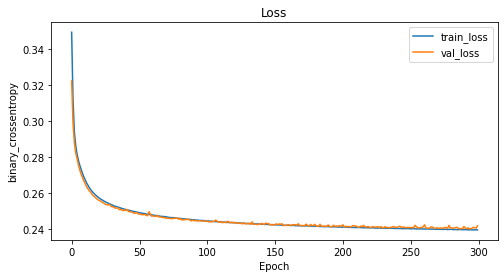

In [ ]:
# графики обучения
N = np.arange(0, len(hist2.history["loss"]))
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

ax1.plot(N, hist2.history["loss"], label="train_loss")
ax1.plot(N, hist2.history["val_loss"], label="val_loss")

ax1.set_title("Loss")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("binary_crossentropy")
ax1.legend()

print()
print('loss на тестовых данных', c_autoencoder.evaluate(x_test, x_test))

In [ ]:
X2_3_autoenP = c_autoencoder.get_layer(name="encoder").predict(X2_3)

In [ ]:
X2_3_autoenP.shape

(17080, 10, 5, 1)

In [ ]:
X2_3_autoen = np.reshape(X2_3_autoenP, (17080,50))

In [ ]:
X2_3_autoen.shape

(17080, 50)

In [ ]:
# реконструкция
X2_3_ = c_autoencoder.predict(X2_3)
features2_3_ = np.reshape(X2_3_, (17080,100,50)).astype('float32')

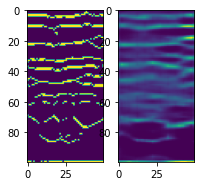

In [ ]:
# реконструкция
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(3, 6))           
a1 = ax1.imshow(features2_3[1])
a2 = ax2.imshow(features2_3_[1])
plt.show()

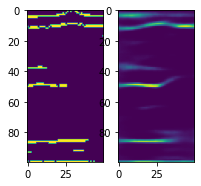

In [ ]:
# реконструкция
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(3, 6))           
a1 = ax1.imshow(features2_3[5])
a2 = ax2.imshow(features2_3_[5])
plt.show()

In [ ]:
name_file = '{0}.npy'.format('modle3')
c_autoencoder.save(way + name_file)

*Посмотреть кластеризацию каждого поотдельности и всех вместе*

In [ ]:
X2_3_autoen.shape

(17080, 50)

In [ ]:
X2_2_pca.shape

(17080, 30)

In [ ]:
X2_1.shape

(17080, 21)

In [ ]:
X_reduced1 = np.hstack((X2_1, X2_2_pca, X2_3_autoen))

In [ ]:
X_reduced1.shape

(17080, 101)

In [ ]:
X_reduced1_optics = clust_optics('X_reduced1_optics', X_reduced1, 10, 0.0005, None)

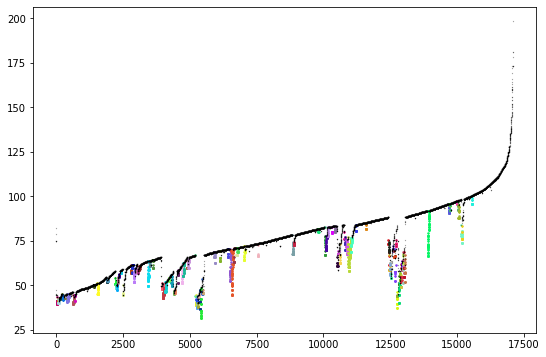

In [ ]:
reachability_plot(X_reduced1_optics)

In [ ]:
visualize_clusters(objects, X_reduced1_optics.labels_)